In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import sys
if sys.platform == 'darwin':
    print("Current system is macOS")
    main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
elif sys.platform == 'linux':
    print("Current system is Ubuntu")
    main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
else:
    print("Current system is neither macOS nor Ubuntu")
    
sys.path.append(main_fold_path)    
os.chdir(main_fold_path)

Current system is Ubuntu


In [2]:
def get_temporal_channel():
    # Posterior superior frontal cortex
    PSFC_ch = ['C9', 'C10', 'C20', 'C21', 'C1', 'C2', 'C11', 'C12'] # left_pSFC_location = ['C9', 'C10', 'C20', 'C21'] , right_pSFC_location = ['C1', 'C2', 'C11', 'C12']
    #Superior temporal gyrus
    STG_ch = ['C22', 'C23', 'C32', 'C33', 'C43', 'C44', 'C30', 'C31', 'C41', 'C42', 'C51', 'C52'] #left_STG_location = ['C22', 'C23', 'C32', 'C33', 'C43', 'C44'], right_STG_location = ['C30', 'C31', 'C41', 'C42', 'C51', 'C52']
    
    ch = []
    for i in PSFC_ch + STG_ch:
        ch.append(int(i[1:])-1)
    return ch
        
def get_frontal_channel():
    # Dorsolateral prefrontal cortex
    DPC_ch = ['C7','C8', 'C17', 'C18', 'C19', 'C28', 'C29', 'C3', 'C4', 'C13', 'C14', 'C15', 'C24', 'C25']# left_DPC_location = ['C7','C8', 'C17', 'C18', 'C19', 'C28', 'C29'], right_DPC_location = ['C3', 'C4', 'C13', 'C14', 'C15', 'C24', 'C25']
    # Ventrolateral prefrontal cortex
    VPC_ch = ['C34', 'C35', 'C45', 'C46','C39', 'C40', 'C49', 'C50'] # left_VPC_location = ['C34', 'C35', 'C45', 'C46'], right_VPC_location = ['C39', 'C40', 'C49', 'C50']
    # Medial prefrontal cortex
    MPC_location = ['C5', 'C6', 'C16', 'C26', 'C27', 'C36', 'C37', 'C38', 'C47', 'C48']  
    
    ch = []
    for i in DPC_ch + VPC_ch + MPC_location:
        ch.append(int(i[1:])-1)
    return ch


In [22]:
temporal_adj.shape

(64, 20)

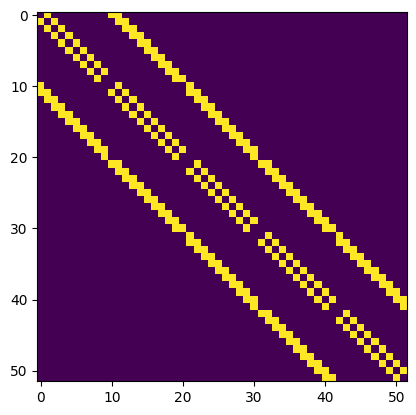

In [3]:
ALL_ADJ = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis_mix_hb/pretreatment_response/adj_matrix.npy'
ALL_ADJ = np.load(ALL_ADJ)
plt.imshow(ALL_ADJ[0])

[8, 9, 19, 20, 0, 1, 10, 11, 21, 22, 31, 32, 42, 43, 29, 30, 40, 41, 50, 51]

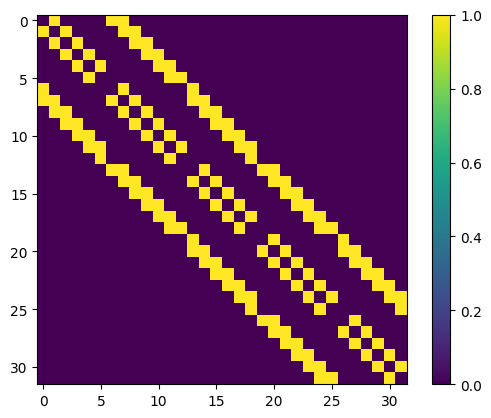

: 

In [5]:
# adj = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/prognosis_mix_hb/pretreatment_response/adj_matrix.npy')

plt.imshow(frontal_adj[0])
plt.colorbar()

In [3]:
all_region_fold = 'allData/prognosis_mix_hb/pretreatment_response'
temporal_region_fold = 'allData/prognosis_mix_hb/pretreatment_response_temporal'
frontal_region_fold = 'allData/prognosis_mix_hb/pretreatment_response_frontal'

if not os.path.exists(temporal_region_fold):
    os.makedirs(temporal_region_fold)
if not os.path.exists(frontal_region_fold):
    os.makedirs(frontal_region_fold)

temporal_ch = get_temporal_channel()
frontal_ch = get_frontal_channel()
temporal_ch = sorted(temporal_ch)
frontal_ch = sorted(frontal_ch)

all_data =np.load(all_region_fold + '/hb_data.npy')
temporal_data = all_data[:,temporal_ch,:]
frontal_data = all_data[:,frontal_ch,:]

all_adj = np.load(all_region_fold + '/adj_matrix.npy')
temporal_adj = all_adj[:,temporal_ch,:][:,:,temporal_ch]
frontal_adj = all_adj[:,frontal_ch,:][:,:,frontal_ch]

label = np.load(all_region_fold + '/label.npy')

# save temporal 
np.save(temporal_region_fold + '/hb_data.npy', temporal_data)
np.save(temporal_region_fold + '/adj_matrix.npy', temporal_adj)
np.save(temporal_region_fold + '/label.npy', label)

# save frontal
np.save(frontal_region_fold + '/hb_data.npy', frontal_data)
np.save(frontal_region_fold + '/adj_matrix.npy', frontal_adj)
np.save(frontal_region_fold + '/label.npy', label)
